In [127]:
from datetime import date 
from datetime import timedelta 
from datetime import datetime
import numpy as np
import pandas as pd
from pandas_ods_reader import read_ods
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from matplotlib import style
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable
style.use('ggplot')  
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=20,12

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [5]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
url = 'https://www.mohfw.gov.in/'

#for getting the web content
web_content = requests.get(url).content

#parsing the html content
soup = BeautifulSoup(web_content,"html.parser")

#removing extra lines and spaces
extract_contents = lambda row: [x.text.replace('\n','') for x in row]

#finding all tables
stats = []
all_rows = soup.find_all('tr')

for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    
    if len(stat)==5:
        stats.append(stat)

#converting the data into panda dataframe

new_cols = ["Sr .No", "Name of State/UT", "Total Confirmed cases", "Recovered", "Death"]
state_data = pd.DataFrame(data = stats,columns = new_cols)

#converting datan into int
state_data['Total Confirmed cases'] = state_data['Total Confirmed cases'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Death'] = state_data['Death'].map(int)

In [7]:
state_data.drop(['Sr .No'],axis=1,inplace=True)
total_cases = state_data['Total Confirmed cases'].sum()
print("Total cases are",total_cases)

Total cases are 28160


In [8]:
state_data['Active cases'] = state_data['Total Confirmed cases']-(state_data['Recovered']+state_data['Death'])
state_data.head()

,Name of State/UT,Total Confirmed cases,Recovered,Death,Active cases
0,Andaman and Nicobar Islands,33,11,0,22
1,Andhra Pradesh,1177,235,31,911
2,Arunachal Pradesh,1,1,0,0
3,Assam,36,27,1,8
4,Bihar,277,56,2,219


In [9]:
state_data.style.background_gradient(cmap='Reds')

,Name of State/UT,Total Confirmed cases,Recovered,Death,Active cases
0,Andaman and Nicobar Islands,33,11,0,22
1,Andhra Pradesh,1177,235,31,911
2,Arunachal Pradesh,1,1,0,0
3,Assam,36,27,1,8
4,Bihar,277,56,2,219
5,Chandigarh,30,17,0,13
6,Chhattisgarh,37,32,0,5
7,Delhi,2918,877,54,1987
8,Goa,7,7,0,0
9,Gujarat,3301,313,151,2837


In [10]:
Sorted_Active_Cases = state_data.groupby('Name of State/UT')['Active cases'].sum().sort_values(ascending=False).to_frame()

In [11]:
Sorted_Active_Cases.head()

,Active cases
Name of State/UT,
Maharashtra,6538
Gujarat,2837
Delhi,1987
Madhya Pradesh,1760
Rajasthan,1626


In [12]:
Sorted_Active_Cases.style.background_gradient(cmap = 'Blues')

,Active cases
Name of State/UT,
Maharashtra,6538
Gujarat,2837
Delhi,1987
Madhya Pradesh,1760
Rajasthan,1626
Uttar Pradesh,1589
Andhra Pradesh,911
Tamil Nadu,841
Telengana,696


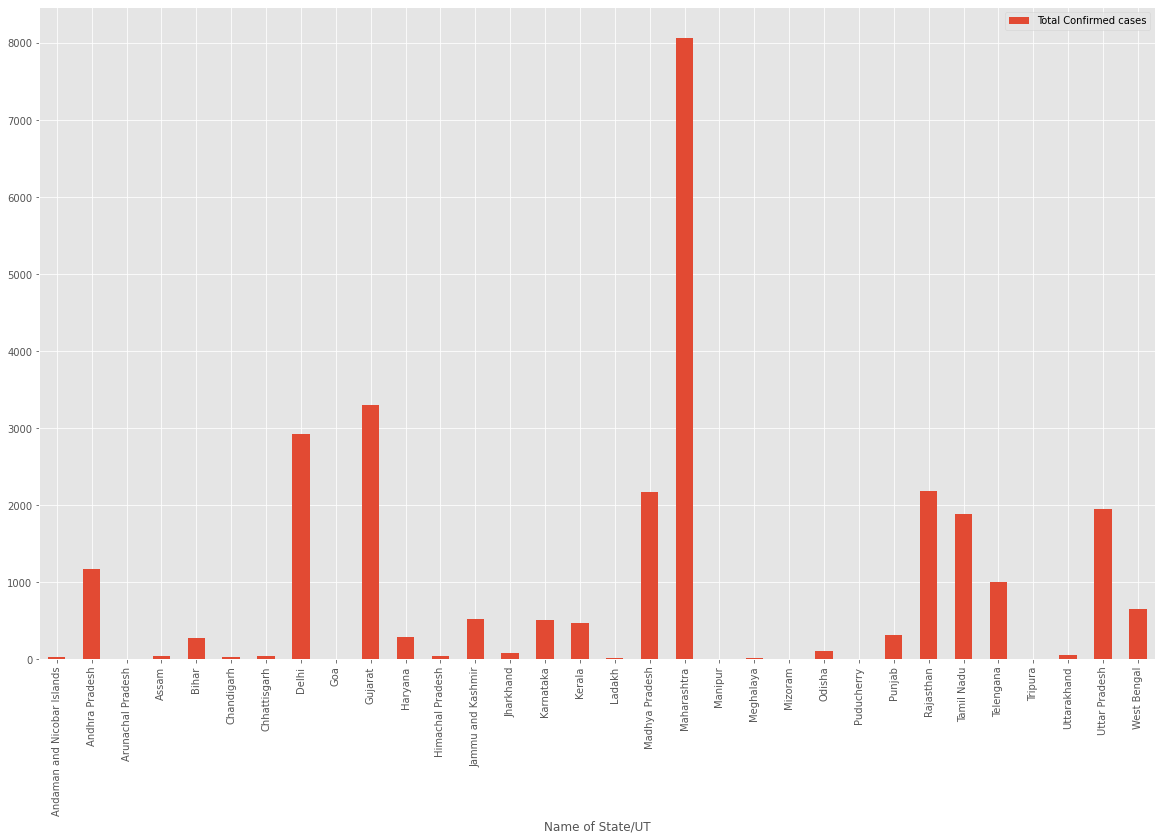

In [13]:
#Graphical Represantation

state_data.plot(kind='bar', x = 'Name of State/UT', y = 'Total Confirmed cases')
plt.show()
state_data.iplot(kind='bar', x = 'Name of State/UT', y = 'Total Confirmed cases')

px.bar(state_data, x = 'Name of State/UT', y = 'Total Confirmed cases')

In [99]:
df = pd.read_csv('/home/digant/Downloads/covid_19_data.csv')
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
 
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
death = df.groupby('Date').sum()['Deaths'].reset_index()
rec= df.groupby('Date').sum()['Recovered'].reset_index()


In [78]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode = 'lines+markers', name = 'Confirmed',line = dict(color='green',width = 2)))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode = 'lines+markers', name = 'Deaths',line = dict(color='red',width = 2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode = 'lines+markers', name = 'Recovered',line = dict(color='blue',width = 2)))

In [90]:
df_confirmed = pd.read_csv('/home/digant/time_series_covid19_confirmed_global.csv')
df_confirmed.rename(columns={'Country/Region':'Country'},inplace = True)
df_pos = pd.merge(df,df_confirmed,on=['Country','Province/State'])

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26


In [81]:
fig = px.density_mapbox(df_pos,lat="Lat",lon="Long",hover_name = "Province/State",hover_data = ["Confirmed","Deaths","Recovered"],animation_frame = "Date",color_continuous_scale = "Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='World Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map" , mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [194]:
df_india = pd.read_excel('/home/digant/Downloads/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/Indian Coordinates.xlsx')
df_india['Latitude'] = df_india['Latitude'].map(float)
df_india['Longitude']= df_india['Longitude'].map(float)
df_confirmed_india = pd.read_csv('/home/digant/Downloads/covid_19_india.csv')
df_confirmed_india.rename(columns={'State/UnionTerritory':'State'},inplace = True)
df_india.rename(columns={'Name of State / UT':'State'},inplace = True)
df_confirmed_india['Date'] = pd.to_datetime(df_confirmed_india['Date'], format='%d/%m/%y')
df_pos_india = pd.merge(df_india,df_confirmed_india,on=['State','State'],right_index=True).sort_values(by='Date')

In [195]:
df_pos_india['Date'] = df_pos_india['Date'].apply(lambda x: x.strftime('%d/%m/%Y'))

In [197]:
fig_india = px.density_mapbox(df_pos_india,lat="Latitude",lon="Longitude",hover_name = "State",hover_data = ["Confirmed","Deaths","Cured"],animation_frame = "Date",color_continuous_scale = "Portland",radius=15,zoom=0,height=700)
fig_india.update_layout(title='India corona virus')
fig_india.update_layout(mapbox_style="open-street-map" , mapbox_center_lon=0)
fig_india.update_layout(margin={"r":0,"t":0,"l":0,"b":0})